In [2]:
from MITOS12Data import MITOS12Data
from matplotlib import pyplot as plt
import os
import numpy as np

basedir = "/media/sf_E_DRIVE/Dropbox/ULB/Doctorat/ImageSet/MITOS12/"
train_dirs = [os.path.join(basedir,d) for d in ["A00_v2", "A01_v2", "A02_v2", "A03_v2", "A04_v2"]]

mitos12 = MITOS12Data(train_dirs=train_dirs)

In [4]:
from sklearn.decomposition import PCA

In [11]:
t = 2084*2084
pixels = np.zeros((2084*2084*len(mitos12.images),3))
for idx,im in enumerate(mitos12.images):
    ar = np.array(im[0])
    pixels[idx*t:idx*t+t,0] = ar[:,:,0].flatten()
    pixels[idx*t:idx*t+t,1] = ar[:,:,1].flatten()
    pixels[idx*t:idx*t+t,2] = ar[:,:,2].flatten()

In [13]:
%matplotlib inline

In [43]:
ts = pixels[::100,:]
px_mean = ts.mean(axis=0)
px_std = ts.std(axis=0)
ts = (ts - ts.mean(axis=0))/ts.std(axis=0)
print ts.min(axis=0),ts.max(axis=0),ts.mean(axis=0),ts.std(axis=0)

[-5.06387097 -2.17033009 -3.25999657] [ 1.33650868  2.62280253  2.33079112] [ -1.56009353e-14   6.50079080e-14   1.07461179e-14] [ 1.  1.  1.]


In [40]:
pca = PCA(n_components=2)

In [41]:
pca.fit(ts)

PCA(copy=True, n_components=2, whiten=False)

In [42]:
print pca.components_, pca.explained_variance_, pca.explained_variance_ratio_

[[-0.55407372 -0.58620239 -0.59107451]
 [ 0.83028233 -0.44055352 -0.3413852 ]] [ 2.75161895  0.22509687] [ 0.91720632  0.07503229]


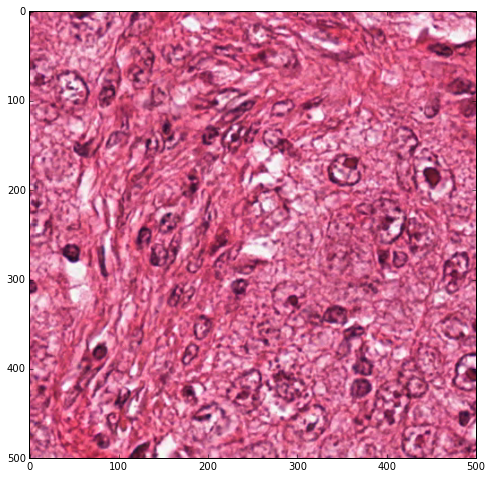

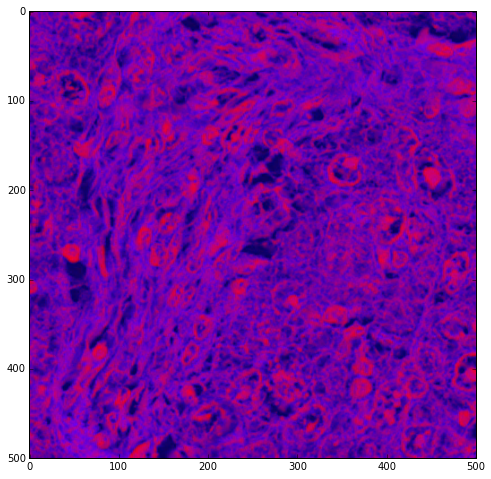

In [44]:
im0 = np.array(mitos12.images[0][0])

im0_norm = (im0.reshape((t,3))-px_mean)/px_std

im0_ = pca.transform(im0_norm).reshape((2084,2084,2))

im0_b = np.zeros(im0.shape)
im0_b[:,:,0] = im0_[:,:,0]
im0_b[:,:,2] = im0_[:,:,1]

min0 = im0_b[:,:,0].min()
max0 = im0_b[:,:,0].max()
im0_b[:,:,0] -= min0
im0_b[:,:,0] /= (max0-min0)

min2 = im0_b[:,:,2].min()
max2 = im0_b[:,:,2].max()
im0_b[:,:,2] -= min2
im0_b[:,:,2] /= (max2-min2)

plt.figure(1, figsize=(15,8))
plt.imshow(im0[500:1000,500:1000])
plt.figure(2, figsize=(15,8))
plt.imshow(im0_b[500:1000,500:1000])
plt.show()

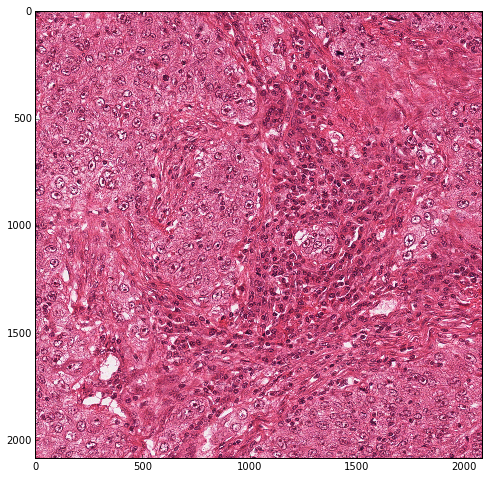

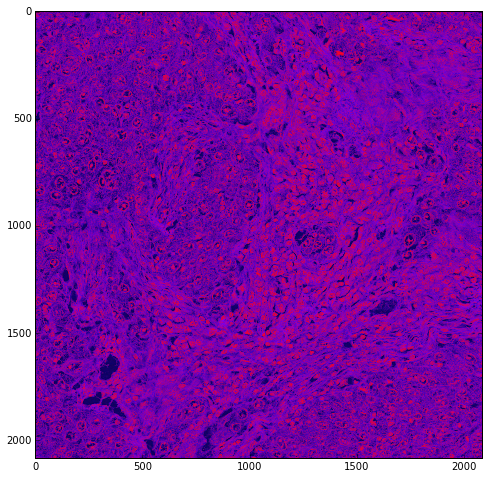

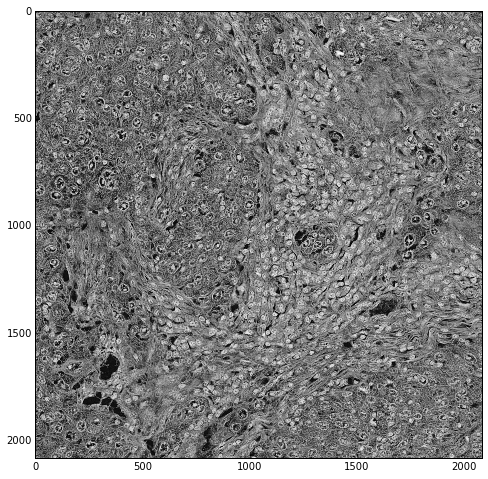

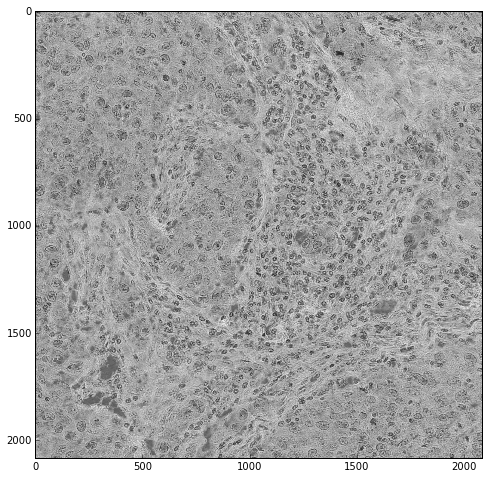

In [60]:
plt.figure(figsize=(15,8))
plt.imshow(im0)
plt.figure(figsize=(15,8))
plt.imshow(im0_b)
plt.figure(figsize=(15,8))
plt.gray()
plt.imshow(im0_[:,:,0])
plt.figure(figsize=(15,8))
plt.imshow(im0_[:,:,1])
plt.show()

[[-0.55407372 -0.58620239 -0.59107451]
 [ 0.83028233 -0.44055352 -0.3413852 ]]


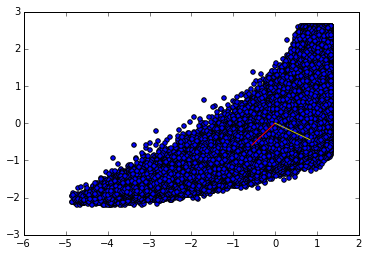

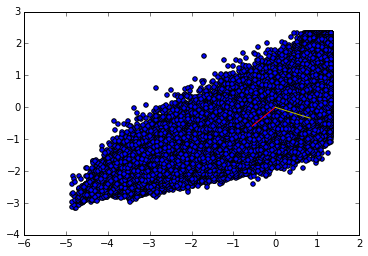

In [57]:
print pca.components_
pca_l0_x = [0, pca.components_[0][0]]
pca_l0_y = [0, pca.components_[0][1]]
pca_l0_z = [0, pca.components_[0][2]]
pca_l1_x = [0, pca.components_[1][0]]
pca_l1_y = [0, pca.components_[1][1]]
pca_l1_z = [0, pca.components_[1][2]]
plt.figure()
plt.scatter(im0_norm[:,0].flatten(),im0_norm[:,1].flatten())
plt.plot(pca_l0_x, pca_l0_y, 'r-')
plt.plot(pca_l1_x, pca_l1_y, 'y-')
plt.figure()
plt.scatter(im0_norm[:,0].flatten(),im0_norm[:,2].flatten())
plt.plot(pca_l0_x, pca_l0_z, 'r-')
plt.plot(pca_l1_x, pca_l1_z, 'y-')
plt.show()

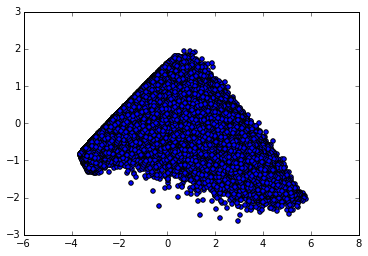

In [53]:
plt.figure()
plt.scatter(im0_[:,:,0].flatten(),im0_[:,:,1].flatten())
plt.show()